По мотивам: http://stamfordresearch.com/outlier-removal-in-python-using-iqr-rule/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Параметры вывода данных на экран

In [2]:
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style('whitegrid')
sns.set_context('paper')

Загрузка данных 

In [3]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dropna().shape

(183, 12)

Визуализация разброса по стоимости билетов

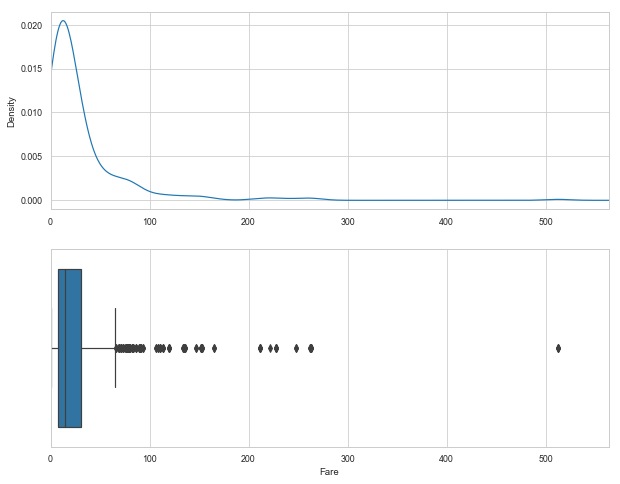

In [5]:
i = 'Fare'

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

df[i].plot(kind='kde');

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)

sns.boxplot(df[i]);
#df.boxplot(column = i, rot=180)

Логарифмируем данные

In [6]:
# Уберем все нули (иначе логарфм обратит эти значения в -inf)
df.loc[df.Fare == 0] = np.nan

# Удалим столбец с каютами, чтобы понизить число "токсичных" строк перед удалением через dropna
df.drop(['Cabin'], axis = 1, inplace = True)

df.dropna(inplace = True)
df['Log_' + i] = np.log(df[i])

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Log_Fare
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1.981001
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,4.266662
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,2.070022
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,3.972177
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,2.085672


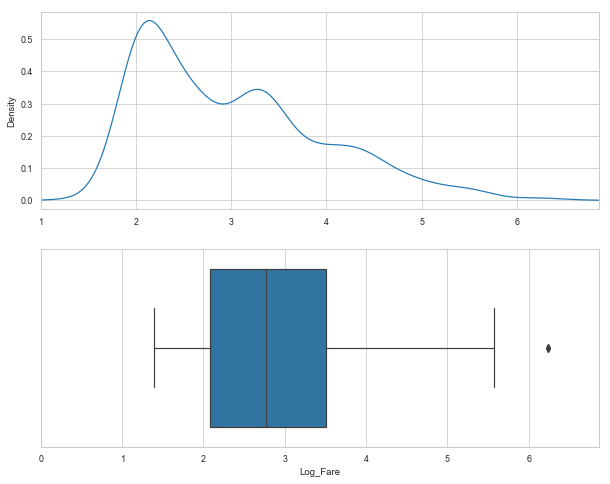

In [18]:
i = 'Log_Fare'

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(1, df[i].max()*1.1)

df[i].plot(kind='kde');

plt.subplot(212)
plt.xlim(0, df[i].max()*1.1)

sns.boxplot(df[i]);

Нормальность распределения повысилась, но вообще стоит сделать преобразование бокса-кокса

In [24]:
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75, 25])
IQR = q75 - q25
min = q25 - IQR*1.5
max = q75 + IQR*1.5

In [25]:
print min, max

-0.05313792967035047 5.650355459931843


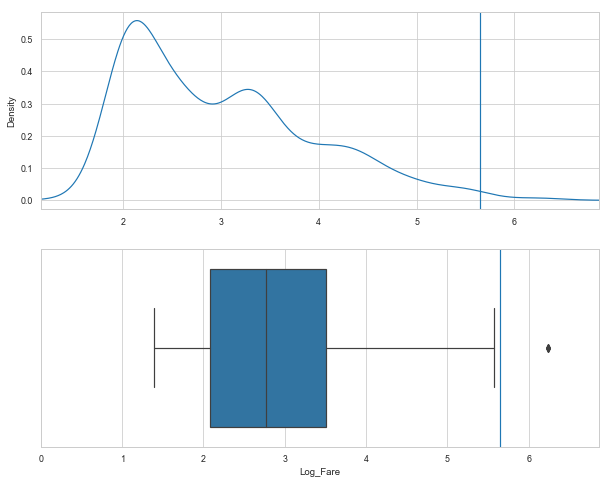

In [27]:
i = 'Log_Fare'

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(df[i].min()/1.2, df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)

df[i].plot(kind='kde');

plt.subplot(212)
plt.xlim(0, df[i].max()*1.1)

sns.boxplot(df[i]);
plt.axvline(x=min)
plt.axvline(x=max)

In [28]:
df['Outlier'] = 0
 
df.loc[df[i] < min, 'Outlier'] = 1
df.loc[df[i] > max, 'Outlier'] = 1

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Log_Fare,Outlier
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1.981001,0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,4.266662,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,2.070022,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,3.972177,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,2.085672,0


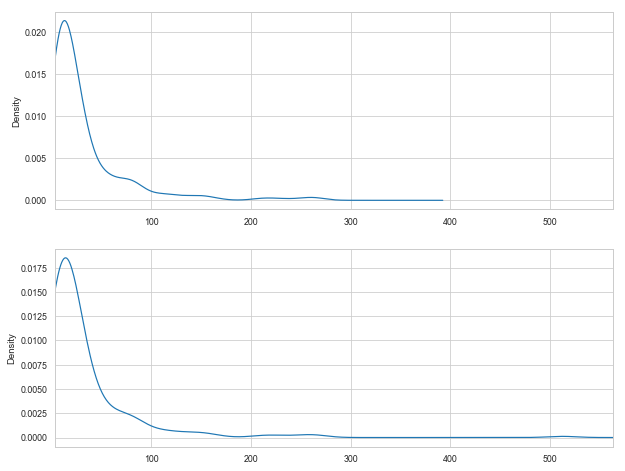

In [35]:
i = 'Fare'

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

df['Fare'][df['Outlier']==0].plot(kind='kde');

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)

df[i].plot(kind='kde');
#df.boxplot(column = i, rot=180)